In [121]:
# ORIGINAL
# https://simpleitk.readthedocs.io/en/release/link_FastMarchingSegmentation_docs.html

# ADDITIONAL
# https://github.com/hinerm/ITK/blob/master/Wrapping/Generators/Python/Tests/FastMarchingImageFilter.py

# I DON'T UNDERSTAND THIS
# http://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/05_Results_Visualization.html

# MAYBE HELPFUL
# https://pyscience.wordpress.com/2014/10/19/image-segmentation-with-python-and-simpleitk/
from __future__ import print_function

import SimpleITK as sitk
import sys

import numpy as np

In [2]:
#!pip install SimpleITK

In [83]:
inputFilename = "ISIC_0024312.jpg"
outputFilename = "output.jpg"

seedPosition = (300, 225) # starting point

sigma = 0.5
alpha = -0.9
beta = 4.0
timeThreshold = 500
stoppingTime = 1000

In [132]:
inputImage = sitk.ReadImage(inputFilename, sitk.sitkFloat32)

#print(inputImage)

smoothing = sitk.CurvatureAnisotropicDiffusionImageFilter()
smoothing.SetTimeStep(0.125)
smoothing.SetNumberOfIterations(5)
smoothing.SetConductanceParameter(9.0)
smoothingOutput = smoothing.Execute(inputImage)

gradientMagnitude = sitk.GradientMagnitudeRecursiveGaussianImageFilter()
gradientMagnitude.SetSigma(sigma)
gradientMagnitudeOutput = gradientMagnitude.Execute(smoothingOutput)

sigmoid = sitk.SigmoidImageFilter()
sigmoid.SetOutputMinimum(0.0)
sigmoid.SetOutputMaximum(1.0)
sigmoid.SetAlpha(alpha)
sigmoid.SetBeta(beta)
sigmoid.DebugOn()
sigmoidOutput = sigmoid.Execute(gradientMagnitudeOutput)

fastMarching = sitk.FastMarchingImageFilter()

seedValue = 0
trialPoint = (seedPosition[0], seedPosition[1], seedValue)

fastMarching.AddTrialPoint(trialPoint)

#fastMarching.SetStoppingValue(stoppingTime)

fastMarchingOutput = fastMarching.Execute(sigmoidOutput)

thresholder = sitk.BinaryThresholdImageFilter()
thresholder.SetLowerThreshold(0.0)
thresholder.SetUpperThreshold(timeThreshold)
thresholder.SetOutsideValue(0)
thresholder.SetInsideValue(255)

result = thresholder.Execute(fastMarchingOutput)

sitk.WriteImage(result, outputFilename);

In [93]:
# NOT WORKING
resample = sitk.ResampleImageFilter()
resample.SetReferenceImage(result)
resample.SetInterpolator(sitk.sitkNearestNeighbor)

image_changed = resample.Execute(inputImage)
type(image_changed)
#sitk.WriteImage(image_changed, "changed.jpg")

SimpleITK.SimpleITK.Image

In [139]:
# NOT WORKING
resample = sitk.ResampleImageFilter()
resample.SetReferenceImage(inputImage)
resample.SetInterpolator(sitk.sitkNearestNeighbor)

image_changed = resample.Execute(result)
type(image_changed)
#sitk.WriteImage(image_changed, "changed.jpg")

SimpleITK.SimpleITK.Image

In [96]:
resample = sitk.Resample(inputImage, result)
#sitk.WriteImage(image_changed, "changed.jpg")
#msk1 = sitk.OtsuThreshold(inputImage,0,1)

In [136]:
# NOT WORKING, Cannot even write image I read from folder...
result = sitk.ReadImage(outputFilename, sitk.sitkFloat32)
resample = inputImage - result
#type(resample)


array = sitk.GetArrayViewFromImage(resample).astype(int)
array = np.abs(array)
array[1]

resample = sitk.GetImageFromArray(array)
#sitk.WriteImage(resample, "changed.jpg")

In [133]:
import matplotlib.pyplot as plt

def sitk_show(img, title=None, margin=0.05, dpi=40 ):
    nda = sitk.GetArrayFromImage(img)
    spacing = img.GetSpacing()
    figsize = (1 + margin) * nda.shape[0] / dpi, (1 + margin) * nda.shape[1] / dpi
    extent = (0, nda.shape[1]*spacing[1], nda.shape[0]*spacing[0], 0)
    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])

    plt.set_cmap("gray")
    ax.imshow(nda,extent=extent,interpolation=None)
    
    if title:
        plt.title(title)
    
    plt.show()

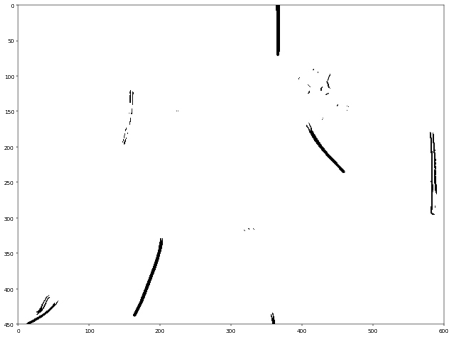

In [140]:
sitk_show(image_changed)